Hi Kamil. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review <a class="tocSkip">

Thank you so much for submitting your project!  While there's room for improvement, on the whole, your project is looking good. I've found some tiny mistakes in your project. They'll be easy to fix. There are also some comments for improvement. They don’t mean that you’ve done anything wrong, but they’re things we wanted to point out that can help you further develop your skills. Every issue with our code is a chance for us to learn something new. Good luck! 

# Research on car sales ads

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1: Open data and general information](#OpenData&GeneralInfo)
3.   [* Step 1: Conclusion](#GeneranlInfoConclusion)
4. [Step 2: Data Preprocessing](#DataPreprocessing)
5. [* Missing Values](#MissingValues)
6. [**Missing Values: Conclusion](#MissingValuesConclusion)
7. [* Changing Data Types](#ChangeDataTypes)
8.   [* Step 2: Conclusion](#Step2Conclusion)
9. [Step 3: Make Calculations](#MakeCalculations)
10.  [* Step 3: Conclusion](#Step3Conclusion)
11. [Step 4: Exploraty of Data Analysis](#EDA)
12.  [* Step 4: Conclusion](#Step4Conclusion)
10. [Step 5: Overall Conclusion](#OverallConclusion)
11. [Checklist](#Checklist)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.  |
|  **Main question of project**  |  Factors that affect the price of the car. |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/learn/data-scientist/courses/3f407e4b-2616-4a43-9c0b-b8b04ba53ba5/sprints/4248/topics/d6696a0b-3944-44d0-8ba2-fb2a58869120/lessons/ff7dea7c-fbd6-4bfd-8089-cfa19d63616e//)    |
| **Datasets**             | [/datasets/vehichles_us.csv](https://code.s3.yandex.net/datasets/vehicles_us.csv)  |

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It’s great that you added a table of contents with links and described the project. 
</div>

### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [1]:
# import all packages
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [4]:
# check for numbers of records in dataset file
# records_num = sum(1 for line in open('https://code.s3.yandex.net/datasets/vehicles_us.csv'))
# print("Number of records in dataset file: {}".format(records_num))

# Many great thanks for Yandex Practicum, that not possible to upload project, like zip archive. Cool. 

In [5]:
# Count columns from first row
header = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv', nrows=1, ).columns
print('There are {} columns in dataset. Here all columns:'.format(len(header)))
header

There are 13 columns in dataset. Here all columns:


Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [6]:
# Creating a dataframe where samples will be appended
df_cars = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')

In [7]:
# Check shape and head
print('Shape:', df_cars.shape)
df_cars.head()

Shape: (51525, 13)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


There were 13 columns in dataset. 

Check dataset types:

In [8]:
df_cars.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [9]:
df_cars.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [10]:
def get_percent_of_na_df(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing_values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing_values'] / df.shape[0],num) * 100
    df_nulls.sort_values(by='Percent of Nulls', ascending=False, inplace=True)
    return df_nulls

display(get_percent_of_na_df(df_cars, 5))

,Missing_values,Percent of Nulls
is_4wd,25953,50.370
paint_color,9267,17.985
odometer,7892,15.317
cylinders,5260,10.209
model_year,3619,7.024
price,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000
transmission,0,0.000


This table shows the percentage of missing values for each column:
- is_4wd: 50% - very high percentage, means that something wrong with datasets and need to clarify root cause of this missing values.
- paint_color: 18%
- odometer: 15%
- cylinders: 10%
- model_year: 7%

In [11]:
df_cars.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


#### Step1: Conclusion <a name="GeneranlInfoConclusion"></a>

Have missing values for five columns: **model year,** **cylinders,** **odometer,** **paint_color** **is_4wd.** \
The **is_4wd** column has only the single value of 1, indicating the missing values should be a false or 0. \
For **cylinders** column, we can consider looking at similar **model/model_year** and filling in the most common value. \
For **paint color** column, we could do the same, or just leave as "Not available". \
For **odometer** column, we will use the mean or median for the same **model/model_year** as well.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you correctly described all main problems with data. 
</div>

### Step 2. Data preprocessing <a name="DataPreprocessing"></a>

#### 2.1 Missing values <a name="MissingValues"></a>

Now check missing values again:

In [12]:
df_cars.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

After let's check model_year column:

In [13]:
# missing values in model_year column:
df_cars[df_cars.isnull().model_year].head(20).iloc[:,0:11]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN
102,10800,NaN,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0
114,23700,NaN,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN
144,8995,NaN,chevrolet silverado 1500,excellent,8.0,gas,119726.0,automatic,truck,grey,1.0


In [14]:
# check median for this model_year grouping by model and mileage:
df_cars.groupby(['model','odometer'])['model_year'].median()

model              odometer
acura tl           143.0       2004.0
                   160.0          NaN
                   165.0       2007.0
                   18600.0     2003.0
                   36000.0     2012.0
                                ...  
volkswagen passat  221000.0    2000.0
                   229000.0    2007.0
                   238000.0    2013.0
                   240000.0    2004.0
                   740000.0    2012.0
Name: model_year, Length: 27863, dtype: float64

It is difficult to establish any dependence, since different drivers drive different kilometers and this does not depend on the model as well.

In [15]:
df_cars.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [16]:
df_cars.model_year.describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

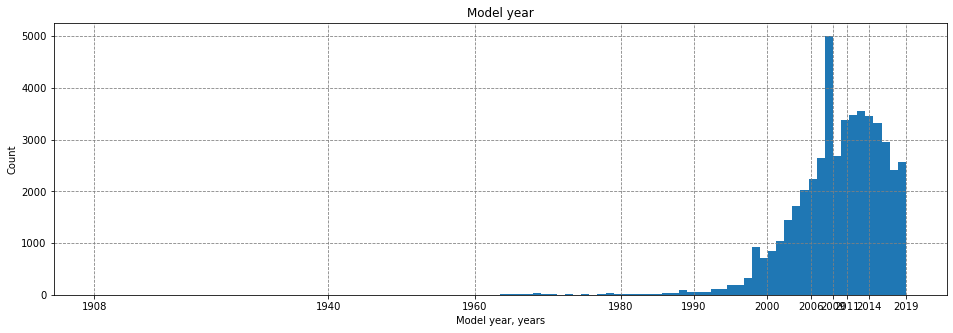

In [18]:
plt.figure(figsize=(16,5))
plt.hist(df_cars.model_year, bins=100)
ticks = [1908, 1940, 1960, 1980, 1990, 2000, 2009, 2006, 2011, 2014, 2019]
plt.xticks(ticks,ticks)
plt.grid(color='gray', linestyle='dashed')
plt.title('Model year')
plt.xlabel('Model year, years')
plt.ylabel('Count')
plt.show()

* This graph displays the model year column. Most advertisements for the sale of models from 2000 to 2019. There is a maximum model ejection for 2009, which reaches 5000 ads.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1: [V] - Done
    
It's great that you didn't forget the axis labels, but please add the title to the graph. Could you please describe graphs? Please note that after each of the graphs it's necessary to add description/conclusions.
Please note that this applies to all other graphs too.
</div>

In [22]:
# Let's write function for fill missing values of model_year column:
def fill_model_year(df):
    # Get unique models of cars from this dataframe - df.
    for car in df['model'].unique().tolist():
        specific_car_df = df[df['model'] == car].dropna()['model_year']
        car_year_list = specific_car_df.unique().tolist()
        # For the missing values, assign a random choice of the years for that model type. Default is 2009
        if car_year_list != []:
            df.loc[(df['model'] == car) & (df['model_year'] != df['model_year']), 'model_year'] = random.choice(car_year_list)
        else:
            df.loc[(df['model'] == car) & (df['model_year'] != df['model_year']), 'model_year'] = 2009.0

In [21]:
#print(help(pd.DataFrame.loc)) - check help. 

Help on property:

    Access a group of rows and columns by label(s) or a boolean array.
    
    ``.loc[]`` is primarily label based, but may also be used with a
    boolean array.
    
    Allowed inputs are:
    
    - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
      interpreted as a *label* of the index, and **never** as an
      integer position along the index).
    - A list or array of labels, e.g. ``['a', 'b', 'c']``.
    - A slice object with labels, e.g. ``'a':'f'``.
    
      .. warning:: Note that contrary to usual python slices, **both** the
          start and the stop are included
    
    - A boolean array of the same length as the axis being sliced,
      e.g. ``[True, False, True]``.
    - A ``callable`` function with one argument (the calling Series or
      DataFrame) and that returns valid output for indexing (one of the above)
    
    See more at :ref:`Selection by Label <indexing.label>`
    
    Raises
    ------
    KeyError
        If any it

In [24]:
# start function with df_cars dataframe like parameter.
fill_model_year(df_cars)

Second and third columns - cylinders and odometer:

In [25]:
# missing values in cylinders column:
df_cars[df_cars.isnull().cylinders].head(10).iloc[:,0:6]

,price,model_year,model,condition,cylinders,fuel
9,9200,2008,honda pilot,excellent,NaN,gas
36,10499,2013,chrysler 300,good,NaN,gas
37,7500,2005,toyota tacoma,good,NaN,gas
59,5200,2006,toyota highlander,good,NaN,gas
63,30000,1966,ford mustang,excellent,NaN,gas
72,3650,2000,subaru impreza,excellent,NaN,gas
75,6950,2005,chevrolet tahoe,excellent,NaN,gas
87,8499,2009,bmw x5,good,NaN,gas
119,14800,2016,kia sorento,like new,NaN,gas
126,25900,2012,chevrolet silverado 1500 crew,good,NaN,other


Usually, for similar models and years of production, the number of cylinders is the same. 

In [26]:
df_cars.groupby(['model','model_year'])['cylinders'].median()

model              model_year
acura tl           1999          6.0
                   2001          6.0
                   2002          6.0
                   2003          6.0
                   2004          6.0
                                ... 
volkswagen passat  2014          4.0
                   2015          4.0
                   2016          4.0
                   2017          4.0
                   2018          4.0
Name: cylinders, Length: 2230, dtype: float64

In [27]:
# fill missing values for 'cylinders' column:
df_cars['cylinders'] = df_cars.cylinders.fillna(df_cars.groupby(['model','model_year'])['cylinders'].transform(np.median))

In [28]:
# check once again missing values for cylinders:
df_cars.cylinders.isnull().sum()

26

In [29]:
df_cars['cylinders'].median()

6.0

In [30]:
# fill in the remaining missing values by median:
df_cars.cylinders.fillna(value=df_cars.cylinders.median(), inplace=True)

Third column - odometer:

In [31]:
df_cars[df_cars.isnull().odometer].head(10).iloc[:,0:7]

,price,model_year,model,condition,cylinders,fuel,odometer
3,1500,2003,ford f-150,fair,8.0,gas,NaN
15,17990,2013,ram 1500,excellent,8.0,gas,NaN
23,7500,2004,jeep wrangler,good,6.0,gas,NaN
24,3950,2009,chrysler 200,excellent,4.0,gas,NaN
25,11499,2017,chevrolet malibu,like new,4.0,gas,NaN
29,5495,2010,chevrolet impala,excellent,6.0,gas,NaN
38,7999,2015,chrysler 200,good,4.0,gas,NaN
41,11995,2017,nissan rogue,like new,4.0,gas,NaN
42,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN
56,4200,2006,jeep grand cherokee,excellent,6.0,gas,NaN


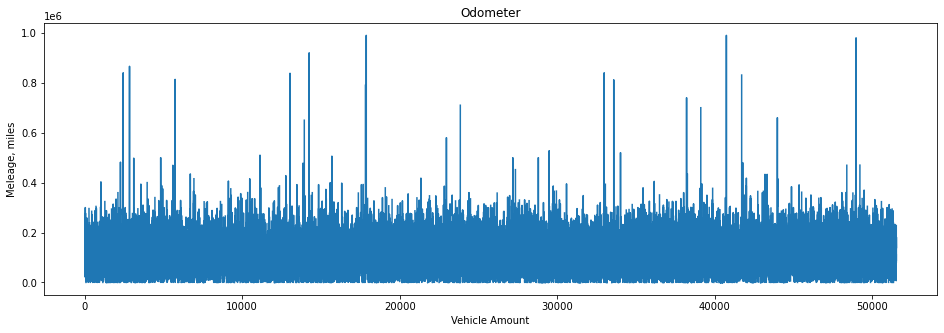

In [32]:
# Lets plot the values for Odometer column and see the distribution: 
plt.figure(figsize=(16,5))
df_cars['odometer'].plot()
plt.title('Odometer')
plt.ylabel('Meleage, miles')
plt.xlabel('Vehicle Amount')
plt.show()

* It seems like the distribution is pretty even across the values. Y axis - is the distance traveled, X axis - vehicle by index.
* Looking at this graph, one can say that we can fill in the missing values with random choices from this distribution.

We can also approximately calculate the median of the vehicle mileage (odometer):

In [33]:
df_cars.groupby(['model','model_year'])['odometer'].median()

model              model_year
acura tl           1999          196000.0
                   2001          177770.0
                   2002          189200.0
                   2003          142500.0
                   2004          183000.0
                                   ...   
volkswagen passat  2014           74931.0
                   2015           68625.0
                   2016           41000.0
                   2017           31755.0
                   2018           32637.0
Name: odometer, Length: 2230, dtype: float64

In [34]:
#another variant, fill missing values by random values.
def fill_in_odometer(df):
    dropped_values      = df_cars['odometer'].dropna().values
    df_cars['odometer'] = df_cars['odometer'].apply(lambda x: random.choice(dropped_values) if pd.isna(x) else x)

fill_in_odometer(df_cars)

Fourth column - paint_color:

In [25]:
df_cars[df_cars.isnull().paint_color].head(10).iloc[:,0:10]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN
3,1500,2003.0,ford f-150,fair,8.0,gas,88126.0,automatic,pickup,NaN
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,92562.0,automatic,sedan,NaN
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN
35,14999,2015.0,dodge charger,good,6.0,gas,63037.0,automatic,sedan,NaN
36,10499,2013.0,chrysler 300,good,6.0,gas,88042.0,automatic,sedan,NaN


In [26]:
df_with_color = df_cars[df_cars['paint_color'].notna()]
print("N. rows with paint_color not null:", df_with_color.shape[0])

df_no_color = df_cars[df_cars['paint_color'].isna()]
print("N. rows with paint_color null:", df_no_color.shape[0])

N. rows with paint_color not null: 42258
N. rows with paint_color null: 9267


In [27]:
# check the most frequently encountered color to see if it has missing values.
df_cars.paint_color.describe()

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

This may not be the best way to fill in missing values with a top color. Another approach to fill missing values for "paint_color" by random color:

In [37]:
# First let's write function which implement this step:
def fill_paint_color(df):
    unique_paint_colors = df['paint_color'].unique()
    # Lets remove the nan value in this list, remember that in python (nan != nan) so we can remove it that way.
    # Iterate through all of the values of the list, check to see if the value is equal to itself.
    unique_paint_colors = list(filter(lambda x: x==x, unique_paint_colors))
    # Assign random color to our missing values
    df['paint_color'].fillna(random.choice(unique_paint_colors), inplace=True)

In [38]:
# Fill in the missing values with this color.
fill_paint_color(df_cars)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Also we can fill a missing values by "unknown". 
</div>

Let's check the last column with missing values - "is_4wd":

In [39]:
df_cars[df_cars.isnull().is_4wd].head(10).iloc[:,0:11]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN
3,1500,2003,ford f-150,fair,8.0,gas,32000.0,automatic,pickup,brown,NaN
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN
11,8990,2012,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN
13,16500,2018,hyundai sonata,excellent,4.0,gas,22104.0,automatic,sedan,silver,NaN
19,13990,2018,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,NaN
21,5250,2007,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,brown,NaN
24,3950,2009,chrysler 200,excellent,4.0,gas,200259.0,automatic,sedan,red,NaN
25,11499,2017,chevrolet malibu,like new,4.0,gas,84769.0,automatic,sedan,brown,NaN


In [40]:
df_cars.is_4wd.unique()

array([ 1., nan])

If the car is four-wheel drive, then most often this is indicated immediately. Therefore, if there is no data, then they can be filled in as zero.

In [41]:
df_cars.is_4wd.fillna(value=0, inplace=True)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, a missing values in the "is_4wd" column can be replaced by "0".
</div>

Let's check the columns again for missing values:

In [42]:
df_cars.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please try to fill a missing values? [V] - Done
</div>

#### 2.1. Missing Values: Conclusion. <a name="MissingValuesConclusion"></a>

There were two types of variables in this project: categorical and quantitative.  
**Quantitative variables included the following columns:**
- model_year, cylinders, odometer.  
**Category variables were present in the column:** 
- paint_color.  
**Boolean variable in column:**
- is_4wd
<br>
* Column **"model_year"**: The missing values have been filled with random values. This approach was chosen because the percentage of missing values was not large (7%) and we can fill the "model year" with random values. Another option is to fill in the missing values with the median.

* Column **"cylinders"**: the approach used here is that missing values can be filled with median based on  "model" grouping and "model year" columns. That is, models of the same model_year most often have the same number of cylinders.

* Column **"odometer"**: The missing values have been filled with random values, because the distribution of odometer pretty much flat. Another approach to group model and model_year and calculate mean value of this groups, but I'm not sure that this will be correct, since the mileage does not depend on the model of the car and the year of its production.

* Column **"paint color"**: the first time, I decided to fill in the missing values with the most popular color, in my case it was white. My second approach was to choose the color "unknown" or "not available". But in the end, I decided to stop at filling in the missing values with the same random color of the car.

* Column **"is_4wd"**: In the case of missing values for a boolean variable that were in a column - "is_4wd", the approach was taken that if there is no value, then the vehicle has two-wheel drive. 


<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please explain why you have used these methods to fill a missing values? [V] - Done
</div>

#### 2.2 Changing Data Types <a name="ChangeDataTypes"></a>

Let's take another look at the datatypes in our dataset:

In [44]:
df_cars.dtypes

price             int64
model_year        int32
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

For columns: "model_year", "cylinders", "odometer" there is no need to use a float64 (real) data type. We can convert these types to a integer data type.

In [45]:
# by using loop will change same types of columns:
for i in ['model_year','cylinders','odometer']:
    df_cars[i] = df_cars[i].astype(int)
# and for "is_4wd" let's set boolean type:
df_cars.is_4wd     = df_cars.is_4wd.astype(bool)

In [46]:
df_cars.dtypes

price            int64
model_year       int32
model           object
condition       object
cylinders        int32
fuel            object
odometer         int32
transmission    object
type            object
paint_color     object
is_4wd            bool
date_posted     object
days_listed      int64
dtype: object

In [61]:
df_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,brown,True,2018-06-23,19
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,32000,automatic,pickup,brown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you brought the data to the desired data types.
</div>

It looks better now and takes up less data.

#### Step 2: Conclusion:<a name="Step2Conclusion"></a>

This step found the missing values in the columns and filled them in. The data type of some columns has also been changed.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that it’s necessary to add a conclusion for each part of the project. [V] - Done
</div>

### Step 3. Make calculations and add them to the table <a name="MakeCalculations"></a>

In [62]:
# created new empty dataframe - df_date for save date. 
df_date = pd.DataFrame()
# first convert "data_posted" column to datetime. 
df_date['date'] = pd.to_datetime(df_cars['date_posted'], format='%Y-%m-%d')
df_cars['week'] = df_date['date'].dt.week
df_cars['month'] = df_date['date'].dt.month
df_cars['year'] = df_date['date'].dt.year
df_cars['vehicle_age'] = df_date['date'].dt.year - df_cars['model_year']

In [63]:
# Let's check 
# IF odometer not equal zero: 
# we can calculate the vehicle's average mileage per year
# ELSE 
# set the vehicle's average mileage per year zero. 
df_cars['average_mileage_year'] = np.where(
    df_cars['odometer'] != 0, 
    df_cars['odometer'] / df_cars['vehicle_age'], 0
)    
df_cars["average_mileage_year"] = df_cars["average_mileage_year"].round(0)

Now let's change the "condition" column from categorical values to numeric values.

In [64]:
# Frist let's check value counts for different category and type of "condition" column: 
df_cars.condition.value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [65]:
# Seems like, need to convert int64 type -> object. 
df_cars['condition']=df_cars.condition.astype(object)

In [66]:
# define dictionary for condition
cond_dict = {'new':5,'like new':4,'excellent':3,'good':2,'fair':1,'salvage':0}
# replace string values with a numeric scale:
df_cars['condition'] = df_cars.condition.replace(cond_dict)
# check again "condition" column: 
df_cars.condition.value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

Let's take another look at what the prepared dataset looks like:

In [67]:
print(df_cars.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas    145000   
1  25500        2009      ford f-150          2          6  gas     88705   
2   5500        2013  hyundai sonata          4          4  gas    110000   
3   1500        2003      ford f-150          1          8  gas     32000   
4  14900        2017    chrysler 200          3          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  week  \
0    automatic     SUV       brown    True  2018-06-23           19    25   
1    automatic  pickup       white    True  2018-10-19           50    42   
2    automatic   sedan         red   False  2019-02-07           79     6   
3    automatic  pickup       brown   False  2019-03-22            9    12   
4    automatic   sedan       black   False  2019-04-02           28    14   

   month  year  vehicle_age  average_mileage_year  
0      6  2018        

In [68]:
# Saving obtained dataframe as a csv file
df_cars.to_csv('vehicles_us_prepared.csv', index=False)

#### Step 3: Conclusion: <a name="Step3Conclusion"></a>

Based on the values of the published date column, new columns have been created - week, month, year, vehicle_age, average_mileage_year. Also, the values of the "condition" column were converted to numerical indicators. The dataframe with the new changes was saved in an intermediate .csv file.

### Step 4. Carry out exploratory data analysis <a name="EDA"></a>

Upload prepared dataset:

In [2]:
df_cars_prep = pd.read_csv('vehicles_us_prepared.csv')

In [3]:
df_cars_prep.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'week', 'month', 'year', 'vehicle_age',
       'average_mileage_year'],
      dtype='object')

In [6]:
df_cars_prep.price.describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

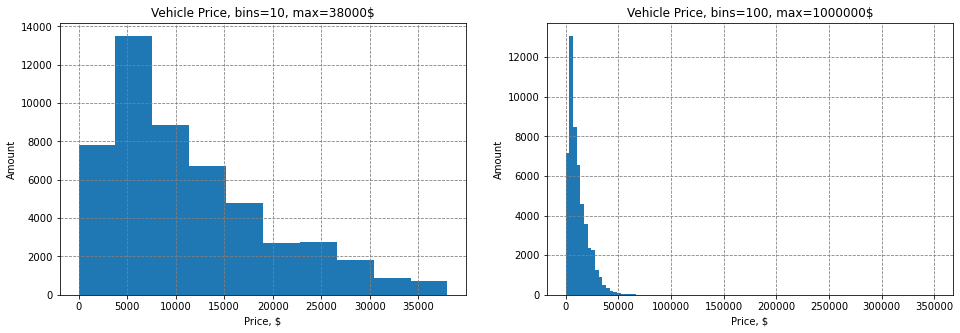

In [5]:
# Prepare parameters:
plt.figure(figsize=(16,5))
# Plotting different histograms for price column.
plt.subplot(1,2,1)
plt.hist(df_cars_prep.price, bins=10, range=[1,38000])
plt.grid(color='gray', linestyle='dashed')
plt.title('Vehicle Price, bins=10, max=38000$')
plt.xlabel('Price, $')
plt.ylabel('Amount')

plt.subplot(1,2,2)
plt.hist(df_cars_prep.price, bins=100, range=[1,350000])
plt.grid(color='gray', linestyle='dashed')
plt.title('Vehicle Price, bins=100, max=1000000$')
plt.xlabel('Price, $')
plt.ylabel('Amount')

plt.show()

These two histograms show the data distribution for the "Price" column with different settings. Based on them, we can conclude that the most popular number of cars - 13000  have a price range of $ 4,000 - 7,500. 

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:

Could you please describe graph? Please note that after each graph should be description/conclusions. Please take it into account. 
</div>

In [6]:
df_cars_prep.vehicle_age.describe()

count    51525.000000
mean         8.642348
std          6.323075
min         -1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

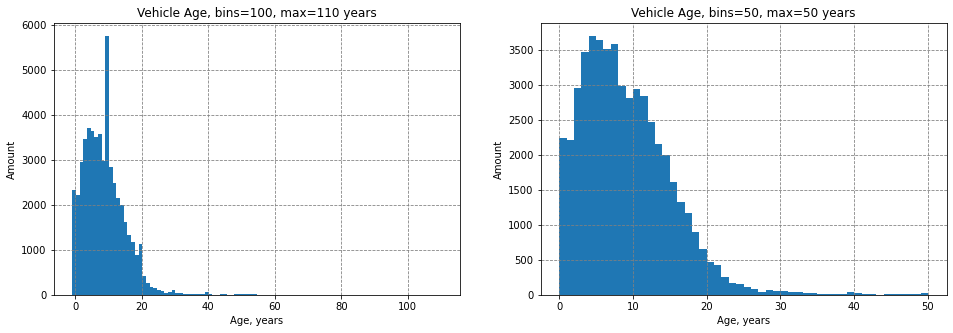

In [7]:
# Prepare parameters:
plt.figure(figsize=(16,5))
# Plotting different histograms for 'vehicle_age' column.
plt.subplot(1,2,1)
plt.hist(df_cars_prep.vehicle_age, bins=100)
plt.grid(color='gray', linestyle='dashed')
plt.title('Vehicle Age, bins=100, max=110 years')
plt.xlabel('Age, years')
plt.ylabel('Amount')

plt.subplot(1,2,2)
plt.hist(df_cars_prep.vehicle_age, bins=50, range=[0,50])
plt.grid(color='gray', linestyle='dashed')
plt.title('Vehicle Age, bins=50, max=50 years')
plt.xlabel('Age, years')
plt.ylabel('Amount')

plt.show()

These two histograms show the data distribution for the "Vehicle Age" column with different settings. The largest number of cars are between 2-12 years old.

In [8]:
# check odometer paraeters and different historgams:
df_cars_prep.odometer.describe()

count     51525.000000
mean     115425.284639
std       65071.592598
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

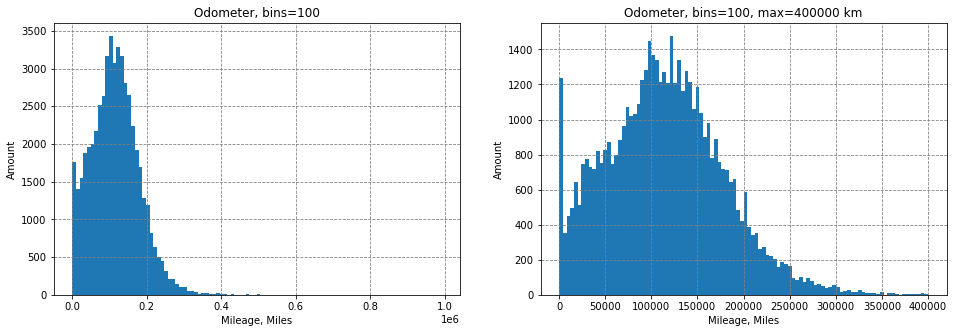

In [9]:
# Prepare parameters:
plt.figure(figsize=(16,5))
# Plotting different histograms for 'vehicle_age' column.
plt.subplot(1,2,1)
plt.hist(df_cars_prep.odometer, bins=100)
plt.grid(color='gray', linestyle='dashed')
plt.title('Odometer, bins=100')
plt.xlabel('Mileage, Miles')
plt.ylabel('Amount')

plt.subplot(1,2,2)
plt.hist(df_cars_prep.odometer, bins=100, range=[0,400000])
plt.grid(color='gray', linestyle='dashed')
plt.title('Odometer, bins=100, max=400000 km')
plt.xlabel('Mileage, Miles')
plt.ylabel('Amount')

plt.show()

These two histograms show the data distribution for the "Odometer" column with different settings and range. The largest number of cars have odometer mileage in the range from 25 thousand to 180 thousand miles.

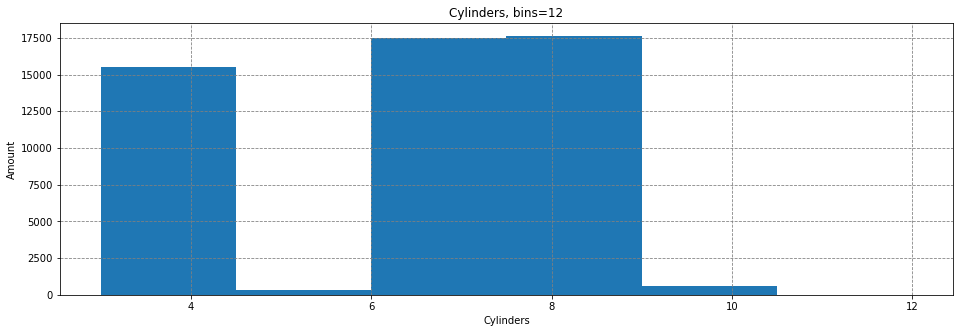

In [10]:
# check cylinders parameters and different historgams:
# Plotting different histograms for 'vehicle_age' column.
plt.figure(figsize=(16,5))
plt.hist(df_cars_prep.cylinders, bins=6)
plt.grid(color='gray', linestyle='dashed')
plt.title('Cylinders, bins=12')
plt.xlabel('Cylinders')
plt.ylabel('Amount')
plt.show()

These histogram show the data distribution for the "Cylinders" column. The largest number of cars have 4, 6 and 8 amount of cylinders. 

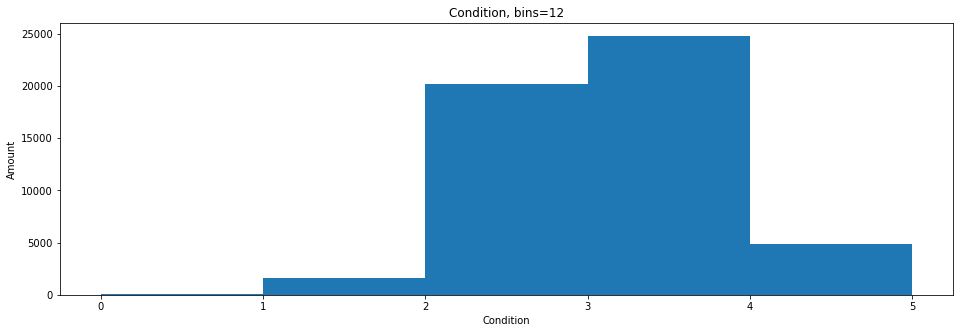

In [11]:
# check cylinders parameters and different historgams:
# Plotting different histograms for 'vehicle_age' column.
plt.figure(figsize=(16,5))
plt.hist(df_cars_prep.condition, bins=5)
plt.title('Condition, bins=12')
plt.xlabel('Condition')
plt.ylabel('Amount')
plt.show()

According to this histogram of column "Condition", most of the cars (25000) in the ads are in almost new condition.

In [12]:
df_cars_prep.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'week', 'month', 'year', 'vehicle_age',
       'average_mileage_year'],
      dtype='object')

In [13]:
df_cars_prep[['price','vehicle_age','odometer','cylinders','condition']].describe()

,price,vehicle_age,odometer,cylinders,condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,8.642348,115425.284639,6.120272,2.637535
std,10040.803015,6.323075,65071.592598,1.656361,0.712447
min,1.000000,-1.000000,0.000000,3.000000,0.000000
25%,5000.000000,4.000000,70000.000000,4.000000,2.000000
50%,9000.000000,8.000000,113000.000000,6.000000,3.000000
75%,16839.000000,12.000000,155000.000000,8.000000,3.000000
max,375000.000000,110.000000,990000.000000,12.000000,5.000000


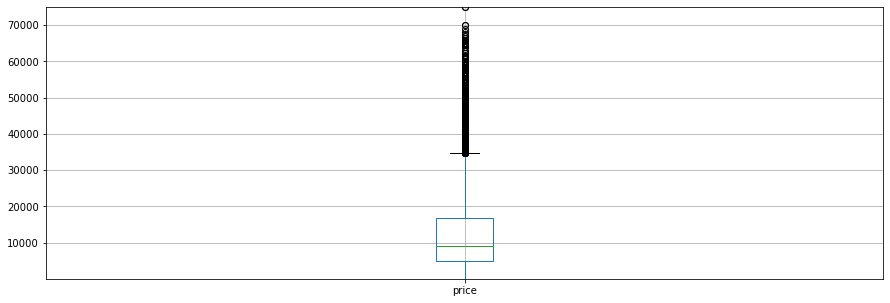

In [7]:
Q1 = df_cars_prep['price'].quantile(0.25)
Q3 = df_cars_prep['price'].quantile(0.75)
IQR = Q3 - Q1
df_cars_prep.boxplot(column='price',figsize=(15,5))
plt.hlines(y=Q1-1.5*IQR, xmin=0, xmax=2, color='red')
plt.ylim(1,75000)
plt.show()

* In this box plot, for column "price", we can see outliers are between 35 and 70 thousand dollars. 

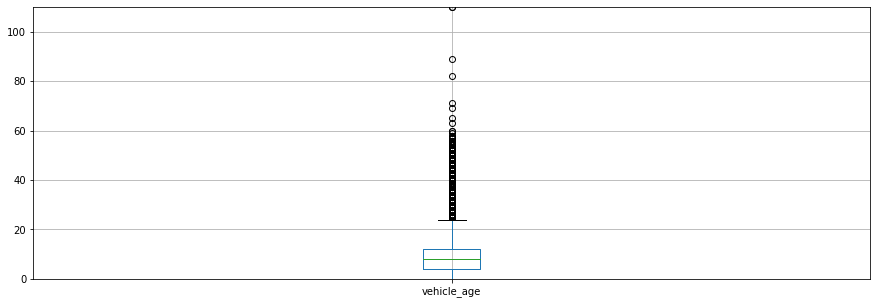

In [8]:
Q1 = df_cars_prep['vehicle_age'].quantile(0.25)
Q3 = df_cars_prep['vehicle_age'].quantile(0.75)
IQR = Q3 - Q1
df_cars_prep.boxplot(column='vehicle_age',figsize=(15,5))
plt.hlines(y=Q1-1.5*IQR, xmin=0, xmax=2, color='red')
plt.ylim(0,110)
plt.show()

* In this box plot, for column "vehicle_age", we can see outliers in range from 22 to 60 years.

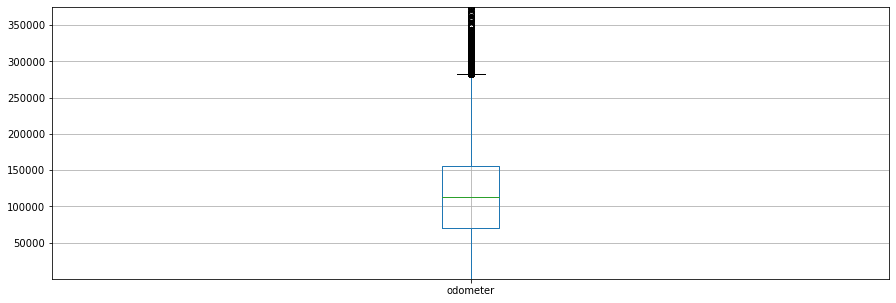

In [9]:
Q1 = df_cars_prep['odometer'].quantile(0.25)
Q3 = df_cars_prep['odometer'].quantile(0.75)
IQR = Q3 - Q1
df_cars_prep.boxplot(column='odometer',figsize=(15,5))
plt.hlines(y=Q1-1.5*IQR, xmin=0, xmax=2, color='red')
plt.ylim(1,375000)
plt.show()

* In this box plot, for column "odometer", outliers appear from 280000 miles. 

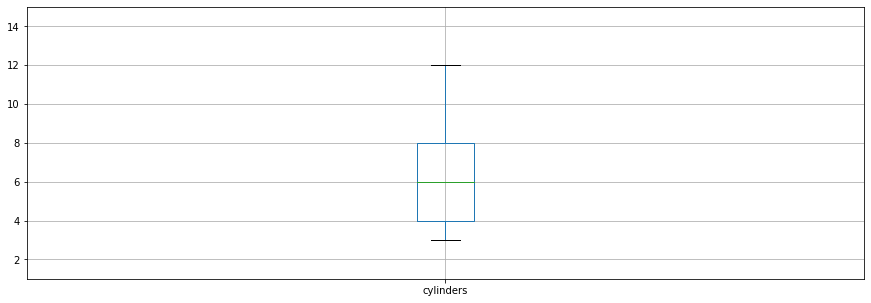

In [10]:
Q1 = df_cars_prep['cylinders'].quantile(0.25)
Q3 = df_cars_prep['cylinders'].quantile(0.75)
IQR = Q3 - Q1
df_cars_prep.boxplot(column='cylinders',figsize=(15,5))
plt.hlines(y=Q1-1.5*IQR, xmin=0, xmax=2, color='red')
plt.ylim(1,15)
plt.show()

* In the boxplot for "cylinders" column, no outliers. 

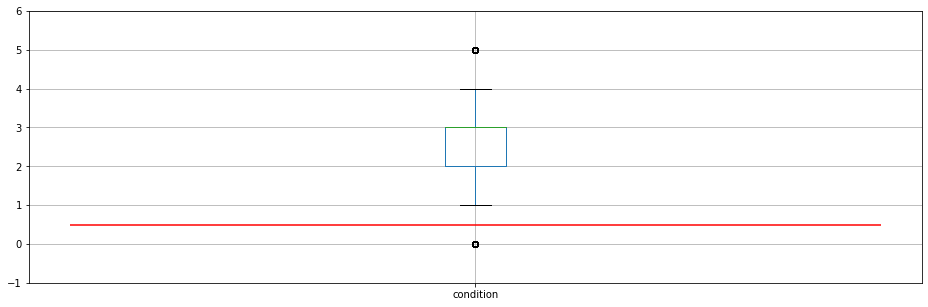

In [11]:
Q1 = df_cars_prep['condition'].quantile(0.25)
Q3 = df_cars_prep['condition'].quantile(0.75)
IQR = Q3 - Q1
df_cars_prep.boxplot(column='condition',figsize=(16,5))
plt.hlines(y=Q1-1.5*IQR, xmin=0, xmax=2, color='red')
plt.ylim(-1,6)
plt.show()

In box plot for column "condition", appear only two outliers - at the 0 and 5 level. 

* By manually reading, it seems like we can remove the outliers.
* For **Price** anything above 55,000 seems to be an outlier at least statistically significant.
* For **Vehicle Age** anything above 30 years seems to be an outlier.
* For **Odometer** anything about miles are an outlier. 
* The rest do not have that many outliers.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
   
Please see additional link: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
</div>

In [7]:
# remove and create new filtered dataframe without outliers.
#df_cars_filtered = (df_cars_prep[['price','vehicle_age','odometer']].quantile(0.75) - df_cars_prep[['price','vehicle_age','odometer']].quantile(0.25)) * 1.5 + df_cars_prep[['price','vehicle_age','odometer']].quantile(0.75)

df_cars_filtered = df_cars_prep[(df_cars_prep['price'] < 35000) & (df_cars_prep['vehicle_age'] < 23) & (df_cars_prep['odometer'] < 280000)]
df_cars_with_outliers = df_cars_prep[~((df_cars_prep['price'] < 35000) & (df_cars_prep['vehicle_age'] < 23) & (df_cars_prep['odometer'] < 280000))]
print(df_cars_filtered.shape, df_cars_with_outliers.shape)

(48436, 18) (3089, 18)


* Removed 3089 outliers.

In [8]:
df_cars_prep[['price','vehicle_age','odometer','cylinders','condition']].describe()

,price,vehicle_age,odometer,cylinders,condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,8.642348,115425.284639,6.120272,2.637535
std,10040.803015,6.323075,65071.592598,1.656361,0.712447
min,1.000000,-1.000000,0.000000,3.000000,0.000000
25%,5000.000000,4.000000,70000.000000,4.000000,2.000000
50%,9000.000000,8.000000,113000.000000,6.000000,3.000000
75%,16839.000000,12.000000,155000.000000,8.000000,3.000000
max,375000.000000,110.000000,990000.000000,12.000000,5.000000


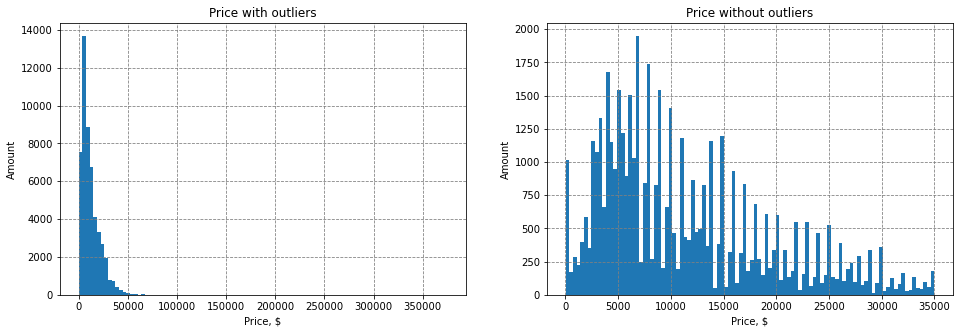

In [9]:
# Prepare parameters:
plt.figure(figsize=(16,5))
# Plotting different histograms for price column.
plt.subplot(1,2,1)
plt.hist(df_cars_prep.price, bins=100)
plt.grid(color='gray', linestyle='dashed')
plt.title('Price with outliers')
plt.xlabel('Price, $')
plt.ylabel('Amount')

plt.subplot(1,2,2)
plt.hist(df_cars_filtered.price, bins=100)
plt.grid(color='gray', linestyle='dashed')
plt.title('Price without outliers')
plt.xlabel('Price, $')
plt.ylabel('Amount')

plt.show()

The distribution for the "price" column is given on 2 histograms. With outliers and without outliers. 

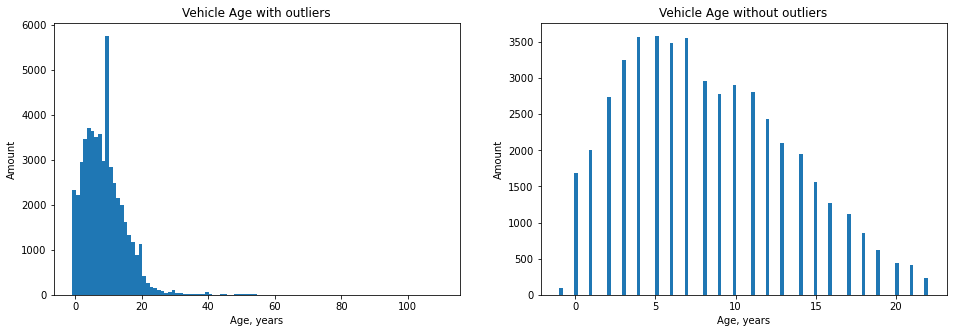

In [10]:
# Prepare parameters:
plt.figure(figsize=(16,5))
# Plotting different histograms for 'vehicle_age' column.
plt.subplot(1,2,1)
plt.hist(df_cars_prep.vehicle_age, bins=100)
plt.title('Vehicle Age with outliers')
plt.xlabel('Age, years')
plt.ylabel('Amount')

plt.subplot(1,2,2)
plt.hist(df_cars_filtered.vehicle_age, bins=100)
plt.title('Vehicle Age without outliers')
plt.xlabel('Age, years')
plt.ylabel('Amount')

plt.show()

The distribution for the "Vehicle Age" column is given on 2 histograms. With outliers and without outliers. 

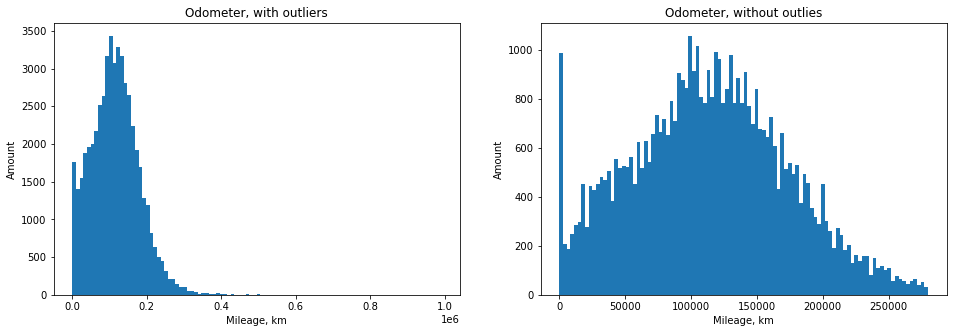

In [11]:
# Prepare parameters:
plt.figure(figsize=(16,5))
# Plotting different histograms for 'vehicle_age' column.
plt.subplot(1,2,1)
plt.hist(df_cars_prep.odometer, bins=100)
plt.title('Odometer, with outliers')
plt.xlabel('Mileage, km')
plt.ylabel('Amount')

plt.subplot(1,2,2)
plt.hist(df_cars_filtered.odometer, bins=100)
plt.title('Odometer, without outlies')
plt.xlabel('Mileage, km')
plt.ylabel('Amount')

plt.show()

* By remove this outliers, out distrubtion looks much reasonable. 
* The Price of the average used vehicle seems to be correlated with how old the vehicle is. Most vehicles will have around 10k miles. The average age of the used vehicles are about 6 years.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please try to describe the type of distribution.
    
Please see for details: https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/
</div>

Mean:  39.531629366586834 	Median: 33.0


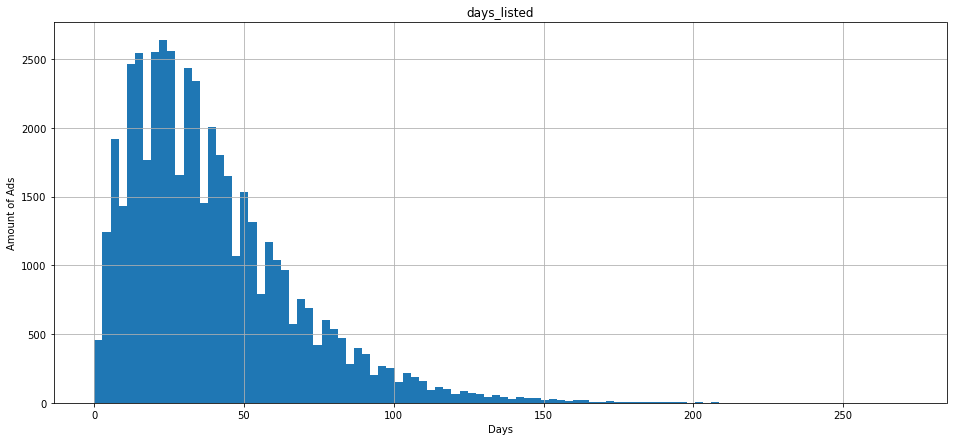

In [12]:
def plot_hist_days(df, col):
    df.hist(column=col, figsize=(16,7), bins=100)
    plt.xlabel('Days')
    plt.ylabel('Amount of Ads')
    
for col in ['days_listed']:
    plot_hist_days(df_cars_filtered, col)
    print("Mean: ", df_cars_filtered[col].mean(), "\tMedian:", df_cars_filtered[col].median())

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that you can use .format to output only required number of decimal places (https://pyformat.info/).
</div>


        * Seems to be average vehicles sells in about 40 days, while the median is about 33 days. This means that the advertisment will be on the market for around a month. We will need to take this into account when selling a vehicle. 
        * Advertisements were successful quickly when their number of days was zero, and an abnormally long time, when the number of days of the advertisement exceeded 150 days.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Yes, you correctly described the typical lifetime of an ad, but please determine when ads were removed quickly, and when they were listed for an abnormally long time. [V] - Done
</div>

* Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

,price
model,
mercedes-benz benze sprinter 2500,34900.000000
chevrolet silverado 1500 crew,28417.148014
ford mustang gt coupe 2d,25154.344482
ford f150 supercrew cab xlt,24991.086154
ford f-350 sd,21773.112281


,condition
model,
ford f-150,2615
chevrolet silverado 1500,2047
ram 1500,1703
chevrolet silverado,1118
jeep wrangler,1008


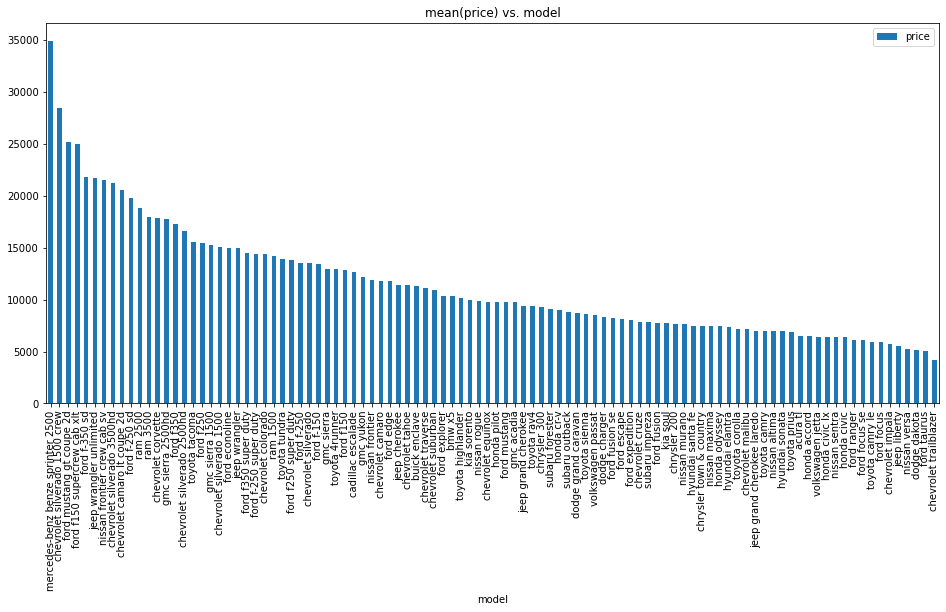

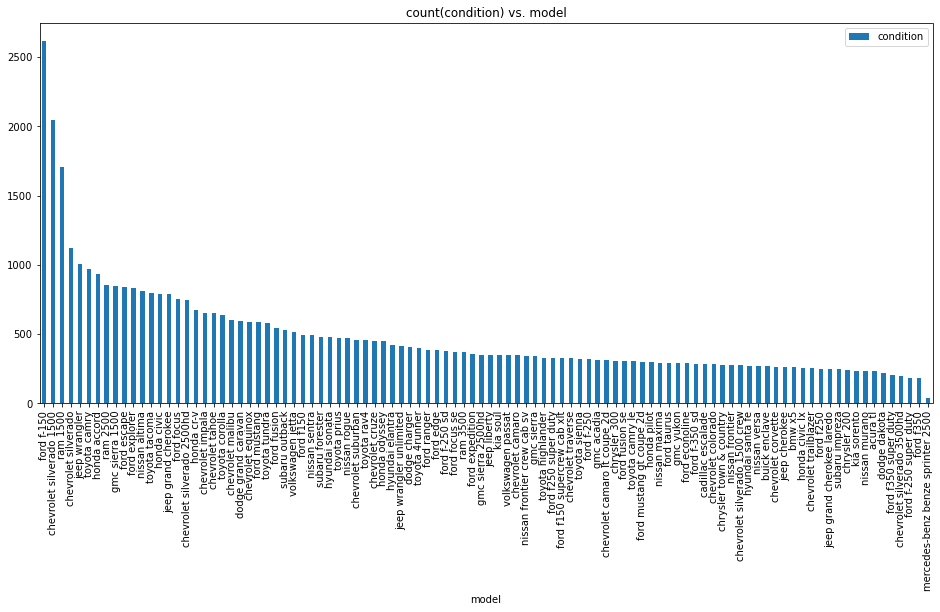

In [13]:
def plot_bar(df, x, y, func):
    title = str(func) + "(" + str(y) + ") vs. " + x
    df_plot = df.pivot_table(index=[x], values=[y], aggfunc=func)
    df_plot.sort_values(by=y, ascending=False).plot(kind='bar', figsize=(16,7), title=title)
    df_new = df_plot.sort_values(by=y, ascending=False).head(5)
    display(df_new)
    return df_new

df_mean_price = plot_bar(df_cars_filtered, 'model', 'price', 'mean')
df_popular = plot_bar(df_cars_filtered, 'model', 'condition', 'count')

* First place, the mercedes-benz benze sprinter 2500 has very high average resale price of 34900.00 dollars
* Second place, chevrolet silverado 1500 crew with a price of 29137.41 dollars.
* The most frequently sold vehicle is the ford f-150, followed by the chevrolet silverado 1500. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you analyzed the graph in details. 
</div>

What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please fix the error below (code doesn't run). [V] - Done
</div>

,model,odometer,vehicle_age,price,condition,transmission,paint_color
1,ford f-150,88705,9,25500,2,automatic,white
3,ford f-150,32000,16,1500,1,automatic,brown
39,ford f-150,234000,10,8000,2,automatic,black
50,ford f-150,69698,12,6200,3,automatic,custom
65,ford f-150,108500,9,12800,3,automatic,white


,odometer,vehicle_age,price,condition
odometer,1.000000,0.461810,-0.462870,-0.293980
vehicle_age,0.461810,1.000000,-0.682914,-0.384594
price,-0.462870,-0.682914,1.000000,0.367858
condition,-0.293980,-0.384594,0.367858,1.000000


<Figure size 432x288 with 0 Axes>

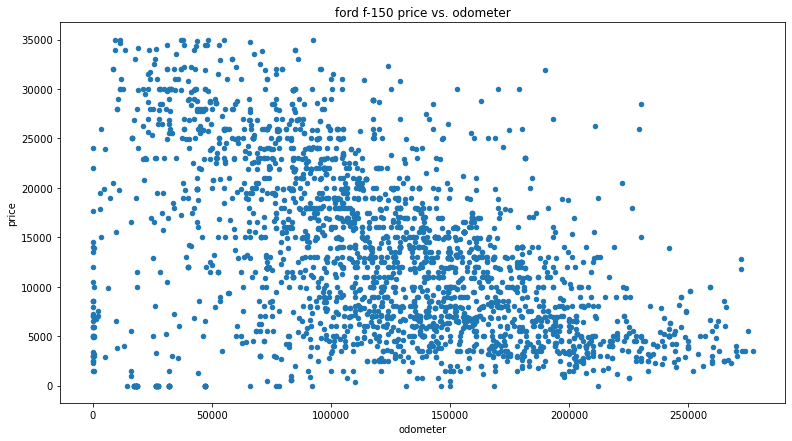

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

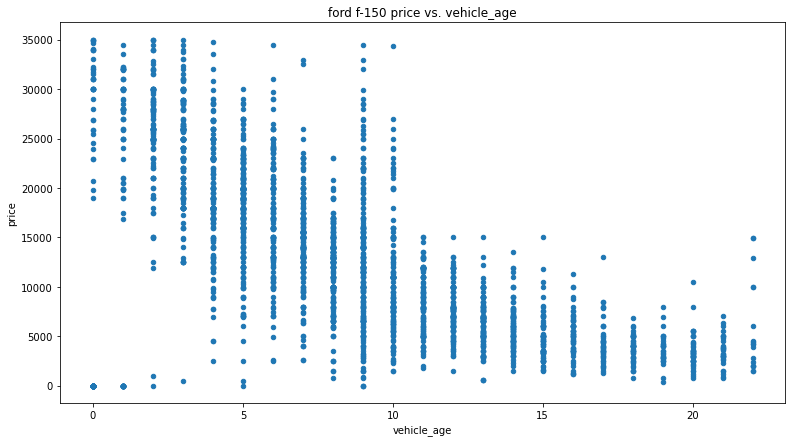

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

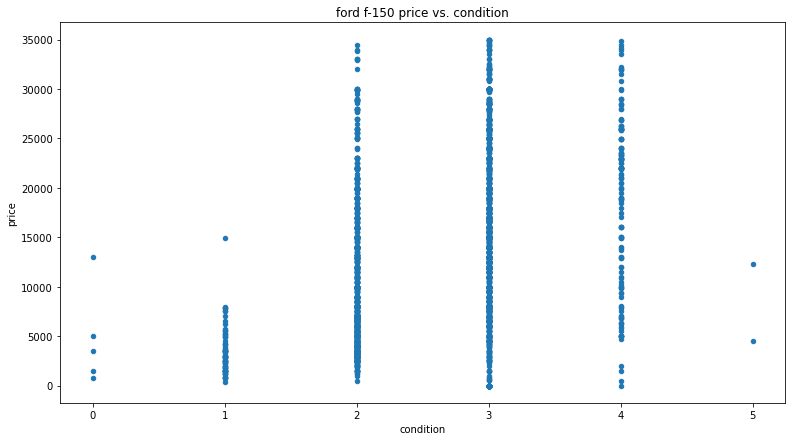

<Figure size 432x288 with 0 Axes>

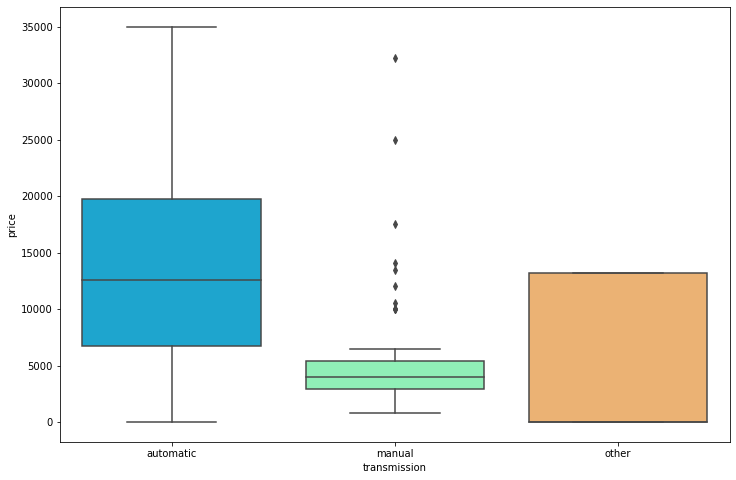

<Figure size 432x288 with 0 Axes>

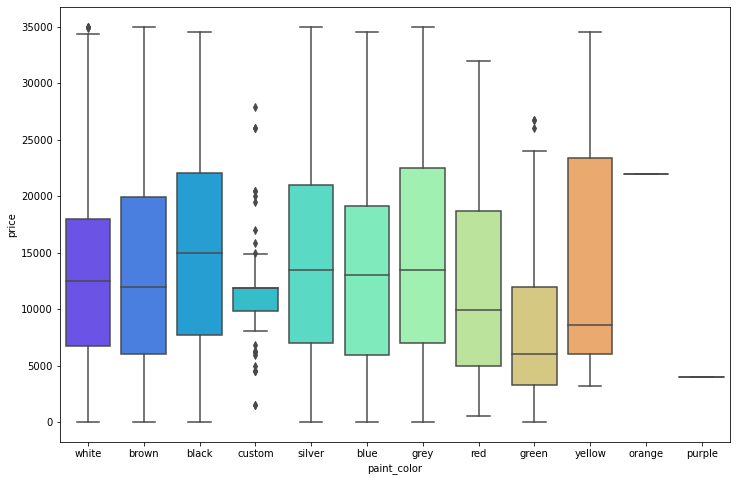

,model,odometer,vehicle_age,price,condition,transmission,paint_color
10,chevrolet silverado 1500,128413,7,19500,3,automatic,black
61,chevrolet silverado 1500,137230,5,16999,2,automatic,white
123,chevrolet silverado 1500,92634,3,21595,3,automatic,black
141,chevrolet silverado 1500,151442,8,13995,3,automatic,silver
144,chevrolet silverado 1500,119726,10,8995,3,automatic,grey


,odometer,vehicle_age,price,condition
odometer,1.000000,0.480569,-0.552194,-0.253841
vehicle_age,0.480569,1.000000,-0.749483,-0.282652
price,-0.552194,-0.749483,1.000000,0.324657
condition,-0.253841,-0.282652,0.324657,1.000000


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

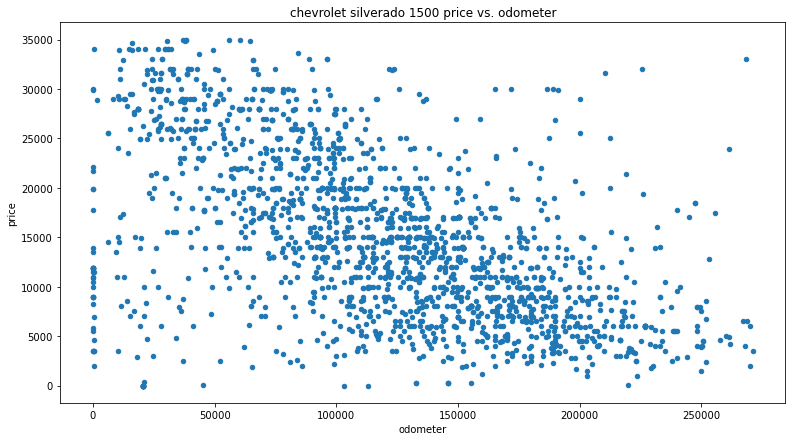

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

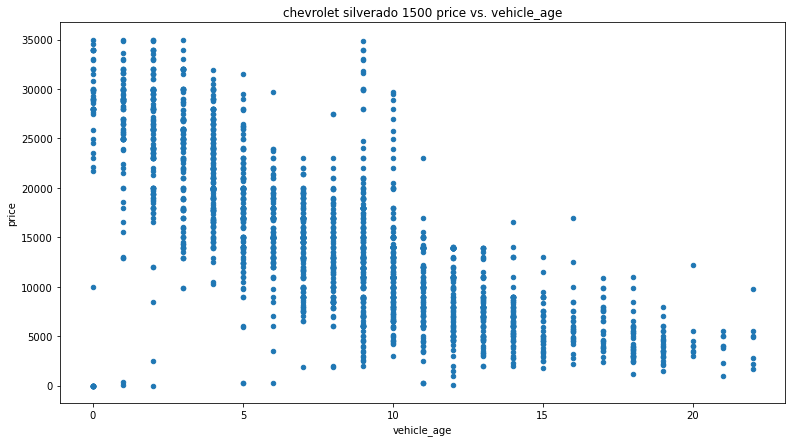

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

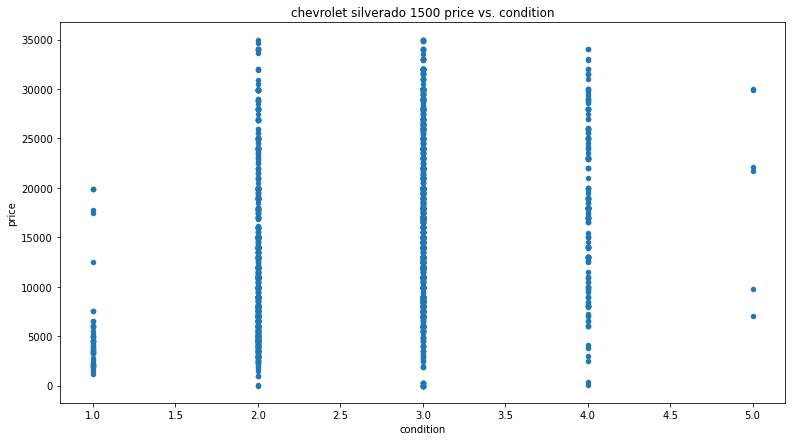

<Figure size 432x288 with 0 Axes>

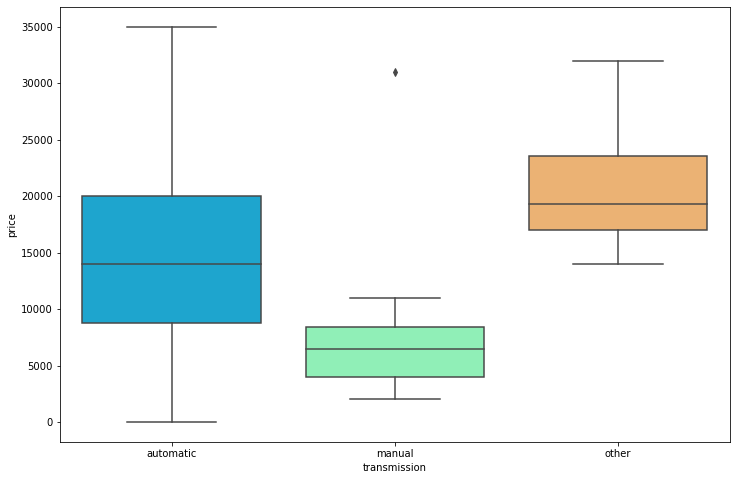

<Figure size 432x288 with 0 Axes>

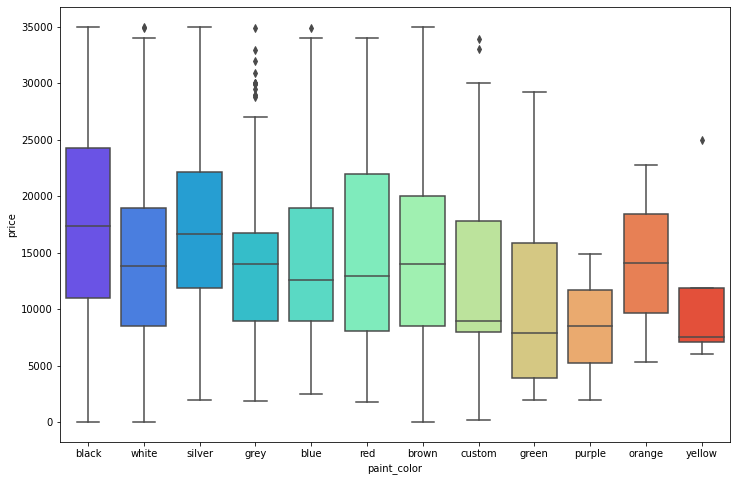

,model,odometer,vehicle_age,price,condition,transmission,paint_color
12,ram 1500,140742,7,18990,3,automatic,brown
15,ram 1500,145000,5,17990,3,automatic,red
16,ram 1500,130725,8,14990,3,automatic,red
60,ram 1500,146000,14,13000,2,automatic,grey
67,ram 1500,114773,7,14950,3,automatic,grey


,odometer,vehicle_age,price,condition
odometer,1.000000,0.465790,-0.520019,-0.284282
vehicle_age,0.465790,1.000000,-0.656488,-0.366127
price,-0.520019,-0.656488,1.000000,0.390290
condition,-0.284282,-0.366127,0.390290,1.000000


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

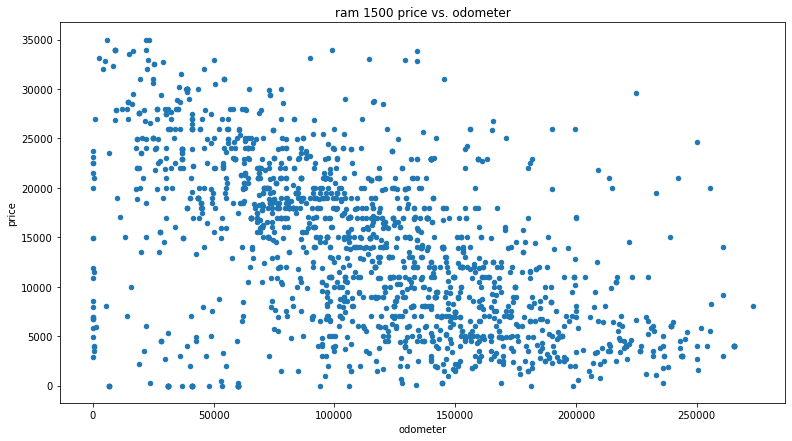

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

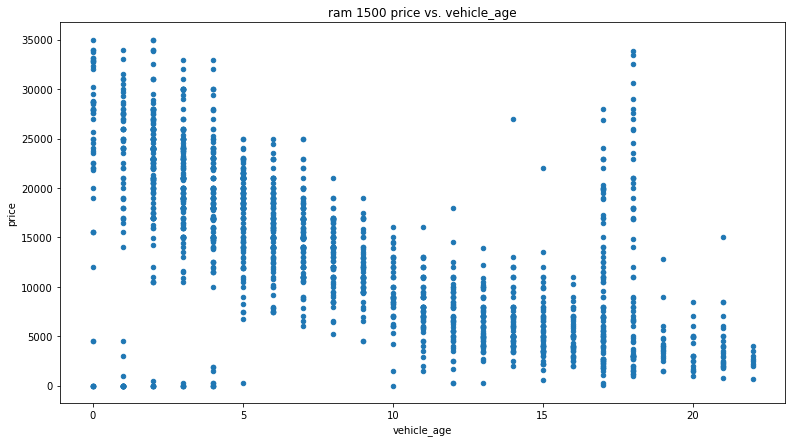

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

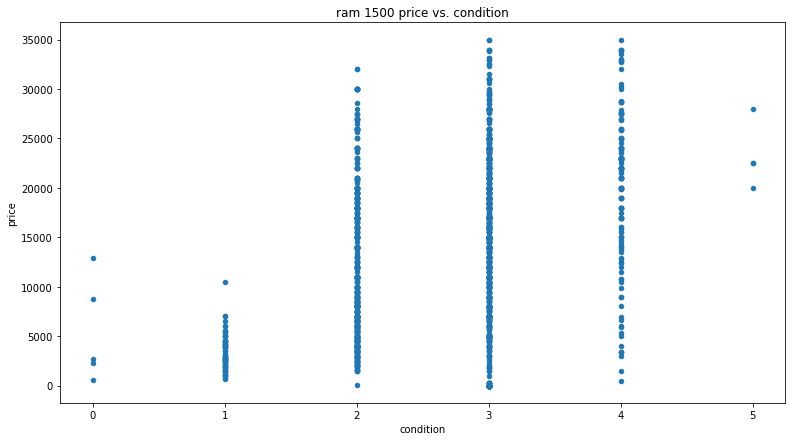

<Figure size 432x288 with 0 Axes>

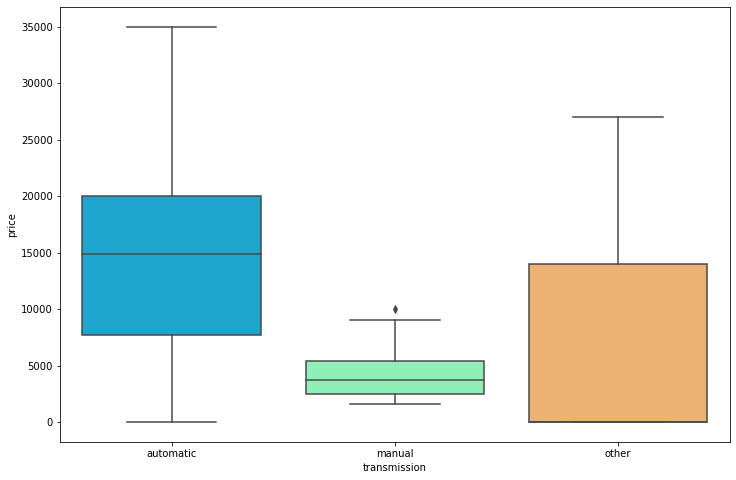

<Figure size 432x288 with 0 Axes>

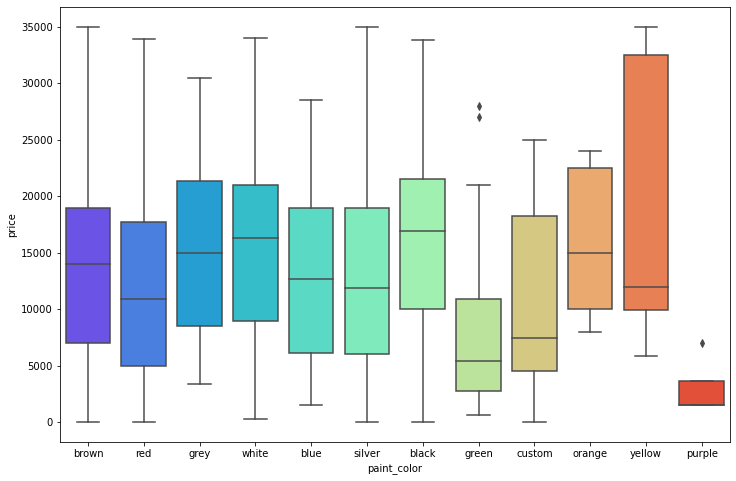

,model,odometer,vehicle_age,price,condition,transmission,paint_color
22,chevrolet silverado,180000,15,7500,4,automatic,red
83,chevrolet silverado,170000,11,11950,2,automatic,black
92,chevrolet silverado,230000,15,2950,2,automatic,brown
353,chevrolet silverado,53000,2,28000,4,automatic,white
355,chevrolet silverado,150000,4,25000,2,automatic,white


,odometer,vehicle_age,price,condition
odometer,1.000000,0.456149,-0.472847,-0.397666
vehicle_age,0.456149,1.000000,-0.731695,-0.493690
price,-0.472847,-0.731695,1.000000,0.553960
condition,-0.397666,-0.493690,0.553960,1.000000


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

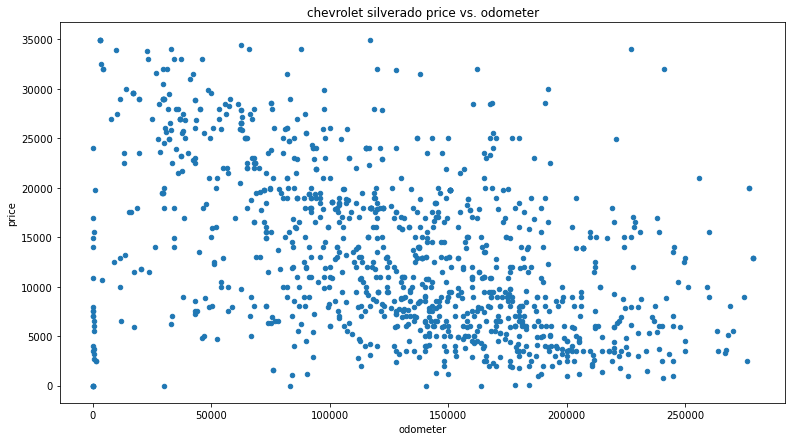

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

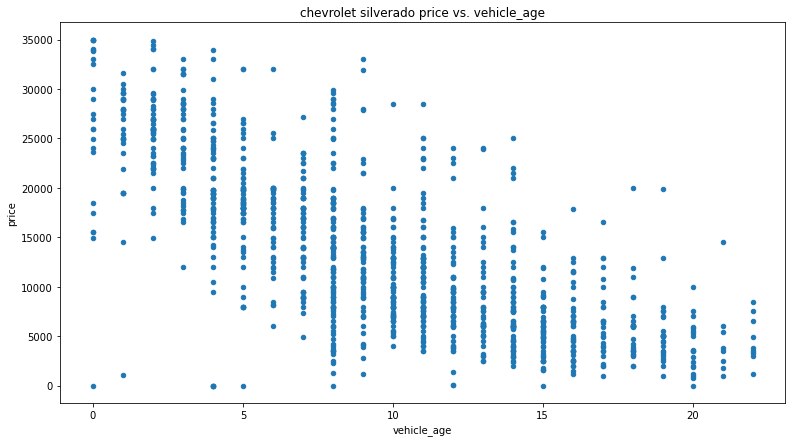

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

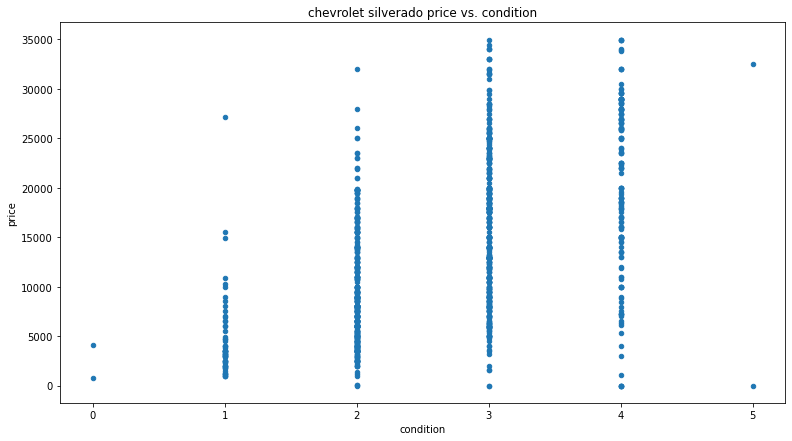

<Figure size 432x288 with 0 Axes>

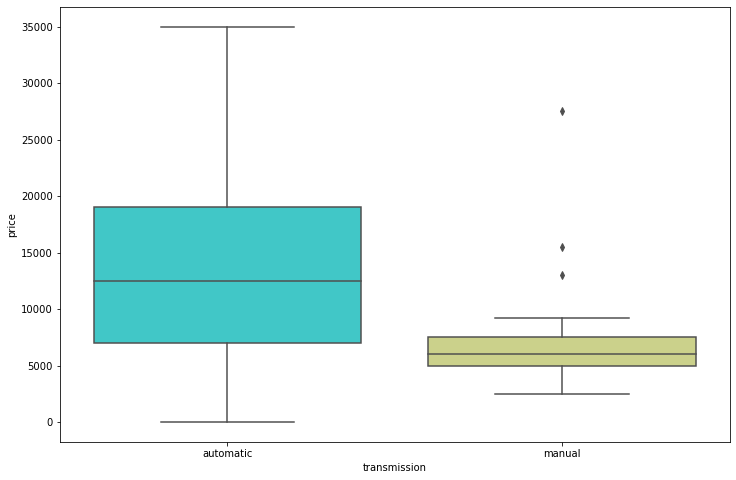

<Figure size 432x288 with 0 Axes>

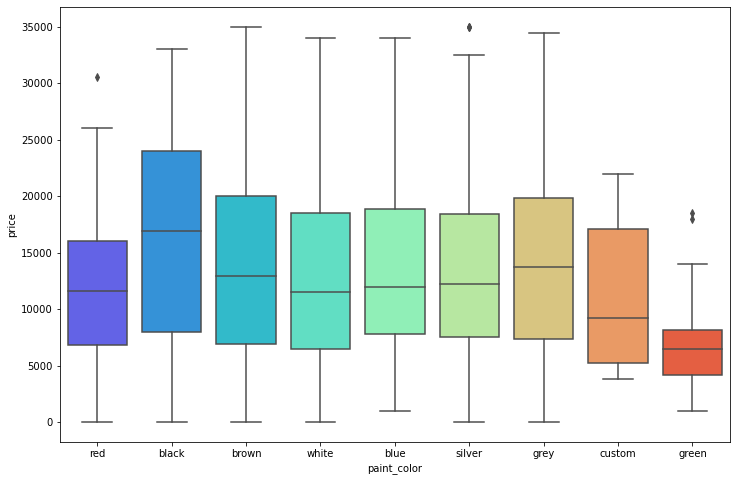

,model,odometer,vehicle_age,price,condition,transmission,paint_color
23,jeep wrangler,90835,14,7500,2,automatic,red
145,jeep wrangler,138806,5,15995,3,automatic,black
151,jeep wrangler,118371,8,14995,3,automatic,orange
182,jeep wrangler,97211,15,11950,3,automatic,custom
183,jeep wrangler,85490,8,16950,3,other,red


,odometer,vehicle_age,price,condition
odometer,1.000000,0.453408,-0.358926,-0.223371
vehicle_age,0.453408,1.000000,-0.468028,-0.197558
price,-0.358926,-0.468028,1.000000,0.177087
condition,-0.223371,-0.197558,0.177087,1.000000


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

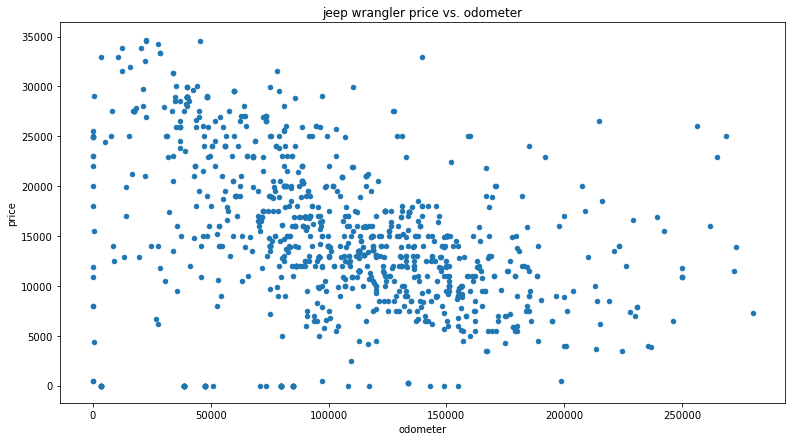

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

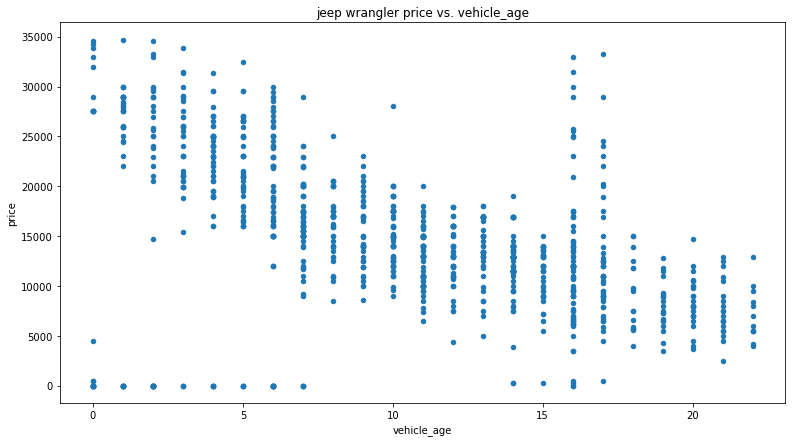

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

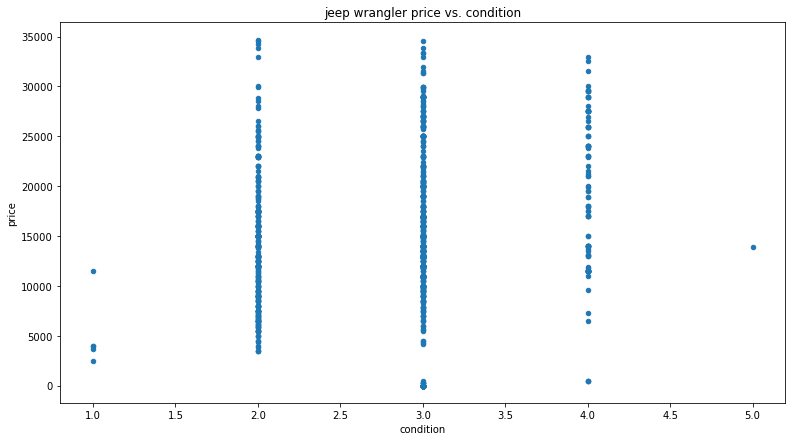

<Figure size 432x288 with 0 Axes>

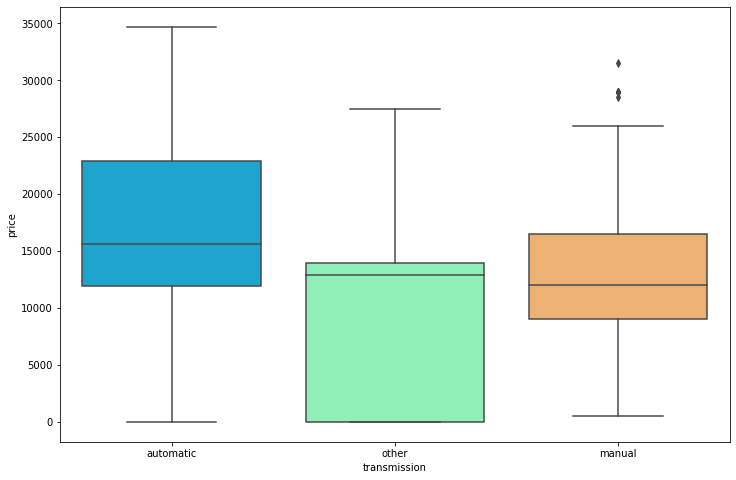

<Figure size 432x288 with 0 Axes>

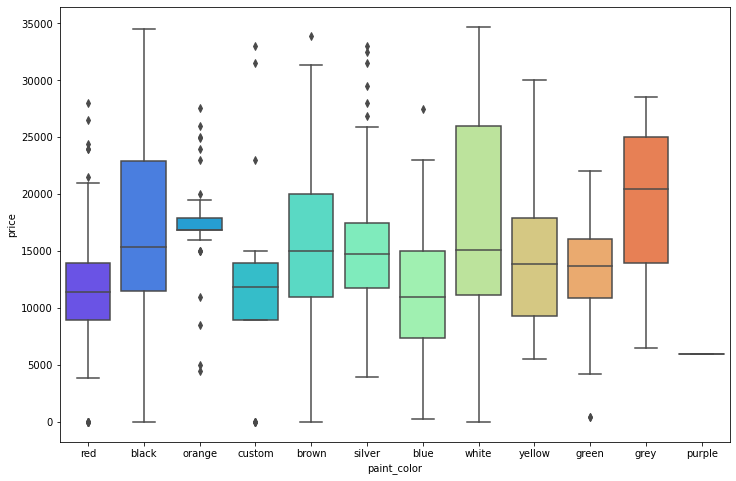

<Figure size 432x288 with 0 Axes>

In [14]:
import time

def scatter_plot(df, x, y, car):
    plt.figure();
    title = car + ' ' + str(y) + " vs. " + x
    df.plot.scatter(x=x, y=y, figsize=(13,7), title=title)
    plt.show()
    plt.clf()
    
def box_whiskers(df, x, y, car):
    plt.figure();
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    sns.boxplot(x=x, y=y, data=df, palette='rainbow')
    plt.show()
    plt.clf()
    
for car in df_popular.index.tolist():
    df_car = df_cars_filtered.loc[df_cars_filtered['model'] == car, ['model', 'odometer', 'vehicle_age', 'price', 'condition', 'transmission', 'paint_color']]
    display(df_car.head(5))
    corr = df_car.corr()
    display(corr.style.background_gradient(cmap='coolwarm'))
    scatter_plot(df_car, 'odometer', 'price', car)
    scatter_plot(df_car, 'vehicle_age', 'price', car)
    scatter_plot(df_car, 'condition', 'price', car)
    box_whiskers(df_car, 'transmission', 'price', car)
    box_whiskers(df_car, 'paint_color', 'price', car)
    print("=="*60)

#### Step 4: Conclusion <a name="Step4Conclusion"></a>

* After study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition were determined outliers. 
* After deletion outliers, the same parameters were examined again. 
* Scatter plots and whiskers boxes helped to understand what factors influence the price the most. 

### Step 5. Overall conclusion <a name="OverallConclusion"></a>

The **Price** is most influenced by:
* **Condition** (0.3678)
* **Odometer** (-0.4628)
* and only then the **Vehicle age** (-0.6829).
![Alttext](https://i.ibb.co/GQkQXvL/image.png)
The more miles on the odometer, the lower the price of the car. The age of the car is influenced but to a lesser extent than the odometer reading of the car. And the condition of the car has the biggest influence.

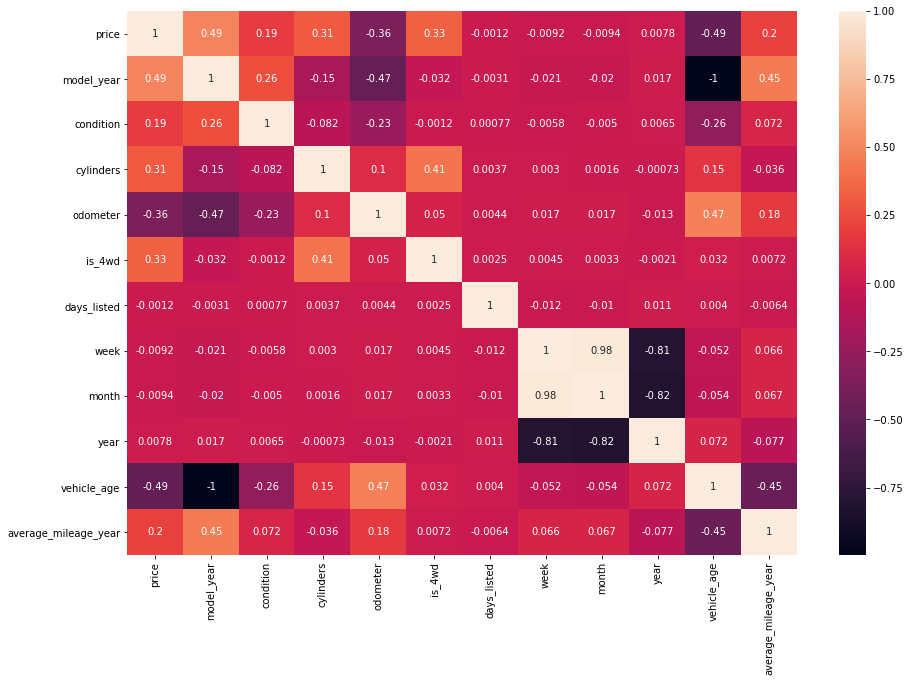

In [17]:
corr = df_cars_filtered.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True, )
plt.show()

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please add a general conclusion. It's important part of the project which contains all main findings.
</div>

### Project completion checklist <a name="Checklist"></a>

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [X]  missing values determined
- [X]  missing values filled in
- [X]  clarification of the discovered missing values provided
- [X]  data types converted
- [X]  explanation of which columns had the data types changed and why
- [X]  calculated and added to the table: day of the week, month, and year the ad was placed
- [X]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [X]  calculated and added to the table: the vehicle's average mileage per year
- [X]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [X]  histograms for each parameter created
- [X]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [X]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [X]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [X]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [X]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [X]  each stage has a conclusion
- [X]  overall conclusion drawn